In [3]:
import pandas as pd
from datasets import load_dataset
import ast
import seaborn as sns
import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

job = ['Senior Data Scientist']
country = ['United States']
##Data cleanup

df_US = df[df.job_country.isin(country)].copy()

#filter to US jobs and data analyst jobs
df_DA_US = df[(df.job_country.isin(country)) & (df.job_title_short.isin(job))].copy()
#transition the str skills to list 
df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

df_explode = df_US.explode('job_skills')
#capitalize the name of the skills 
df_explode['job_skills']=df_explode['job_skills'].str.capitalize()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

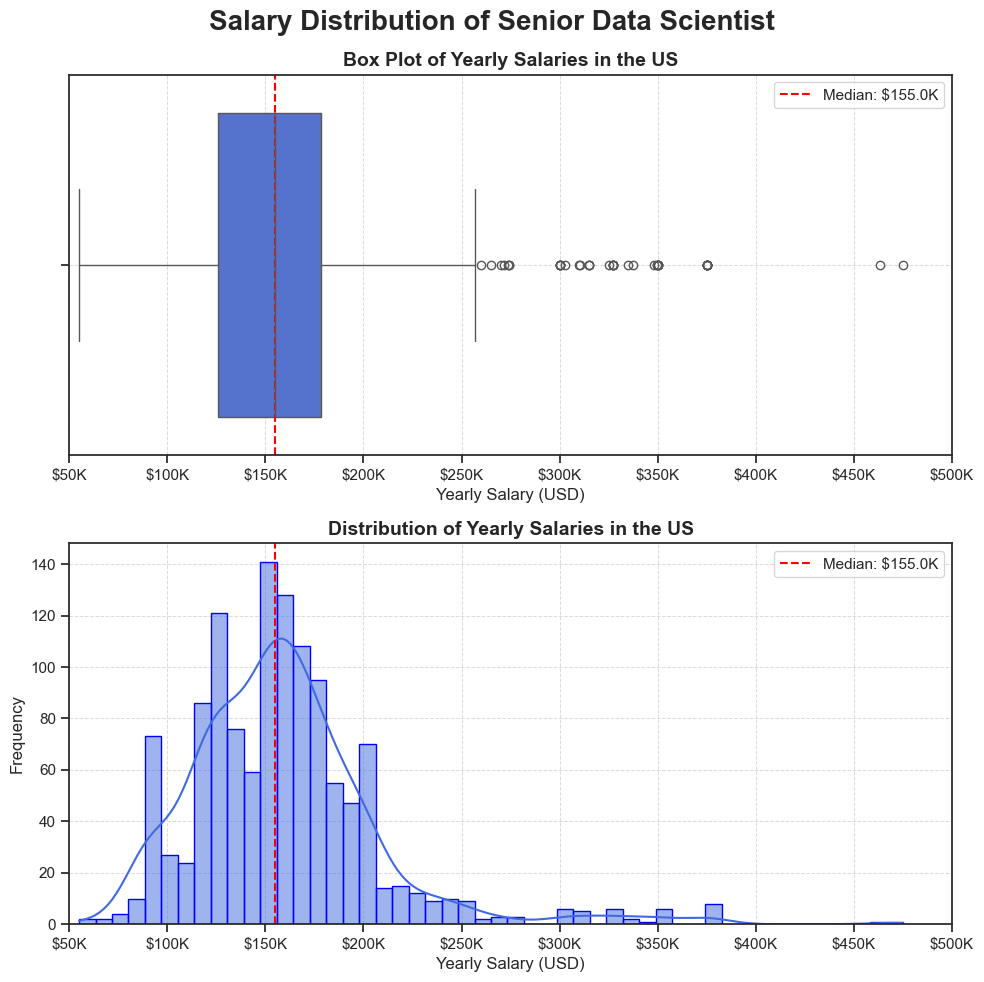

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set seaborn theme
sns.set_theme(style="ticks")

# Calculate the median
median_salary = df_DA_US['salary_year_avg'].median()

# Create a figure with 1 column and 2 rows
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Create the box plot
sns.boxplot(x=df_DA_US['salary_year_avg'], color='royalblue', ax=axes[0])
axes[0].axvline(median_salary, color='red', linestyle='--', label=f'Median: ${median_salary/1000:.1f}K')
axes[0].set_xlabel('Yearly Salary (USD)', fontsize=12)
axes[0].set_title('Box Plot of Yearly Salaries in the US', fontsize=14, fontweight='bold')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
axes[0].set_xlim(50000, 500000)
axes[0].legend()

# Create the KDE plot with histogram
sns.histplot(df_DA_US['salary_year_avg'], bins=50, kde=True, color='royalblue', edgecolor='blue', ax=axes[1])
axes[1].axvline(median_salary, color='red', linestyle='--', label=f'Median: ${median_salary/1000:.1f}K')
axes[1].set_xlabel('Yearly Salary (USD)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Yearly Salaries in the US', fontsize=14, fontweight='bold')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
axes[1].set_xlim(50000, 500000)
axes[1].legend()

# Format the x-axis to show salary in $numberK format
formatter = ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}K')
axes[0].xaxis.set_major_formatter(formatter)
axes[1].xaxis.set_major_formatter(formatter)

# Add a super title for the entire figure
plt.suptitle('Salary Distribution of Senior Data Scientist', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
# Calculate the IQR
Q1 = df_DA_US['salary_year_avg'].quantile(0.25)
Q3 = df_DA_US['salary_year_avg'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier threshold
outlier_threshold = Q3 + 1.5 * IQR

# Filter the dataset to include only the outliers
outliers = df_DA_US[df_DA_US['salary_year_avg'] > outlier_threshold]

# Extract the company names offering jobs in the outliers
outlier_companies = outliers['company_name'].value_counts().head().to_frame()

# Display the company names
print(outlier_companies)


                    count
company_name             
Roblox                  7
Algo Capital Group      4
TikTok                  3
Capital One             2
Source Technology       2
